Student name(s): Nolan Stelzner & Burak Yuksel

You can work in pairs for assignments in DSC 522.

# K Nearest Neighbors Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Get the Data
Read the 'KNN_Project_Data csv file into a dataframe 

This is also an an anonymized dataset

In [2]:
df = pd.read_csv('datasets/KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head() 

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [24]:
df.shape

(1000, 11)

# EDA

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

You do not need to use the same palette.

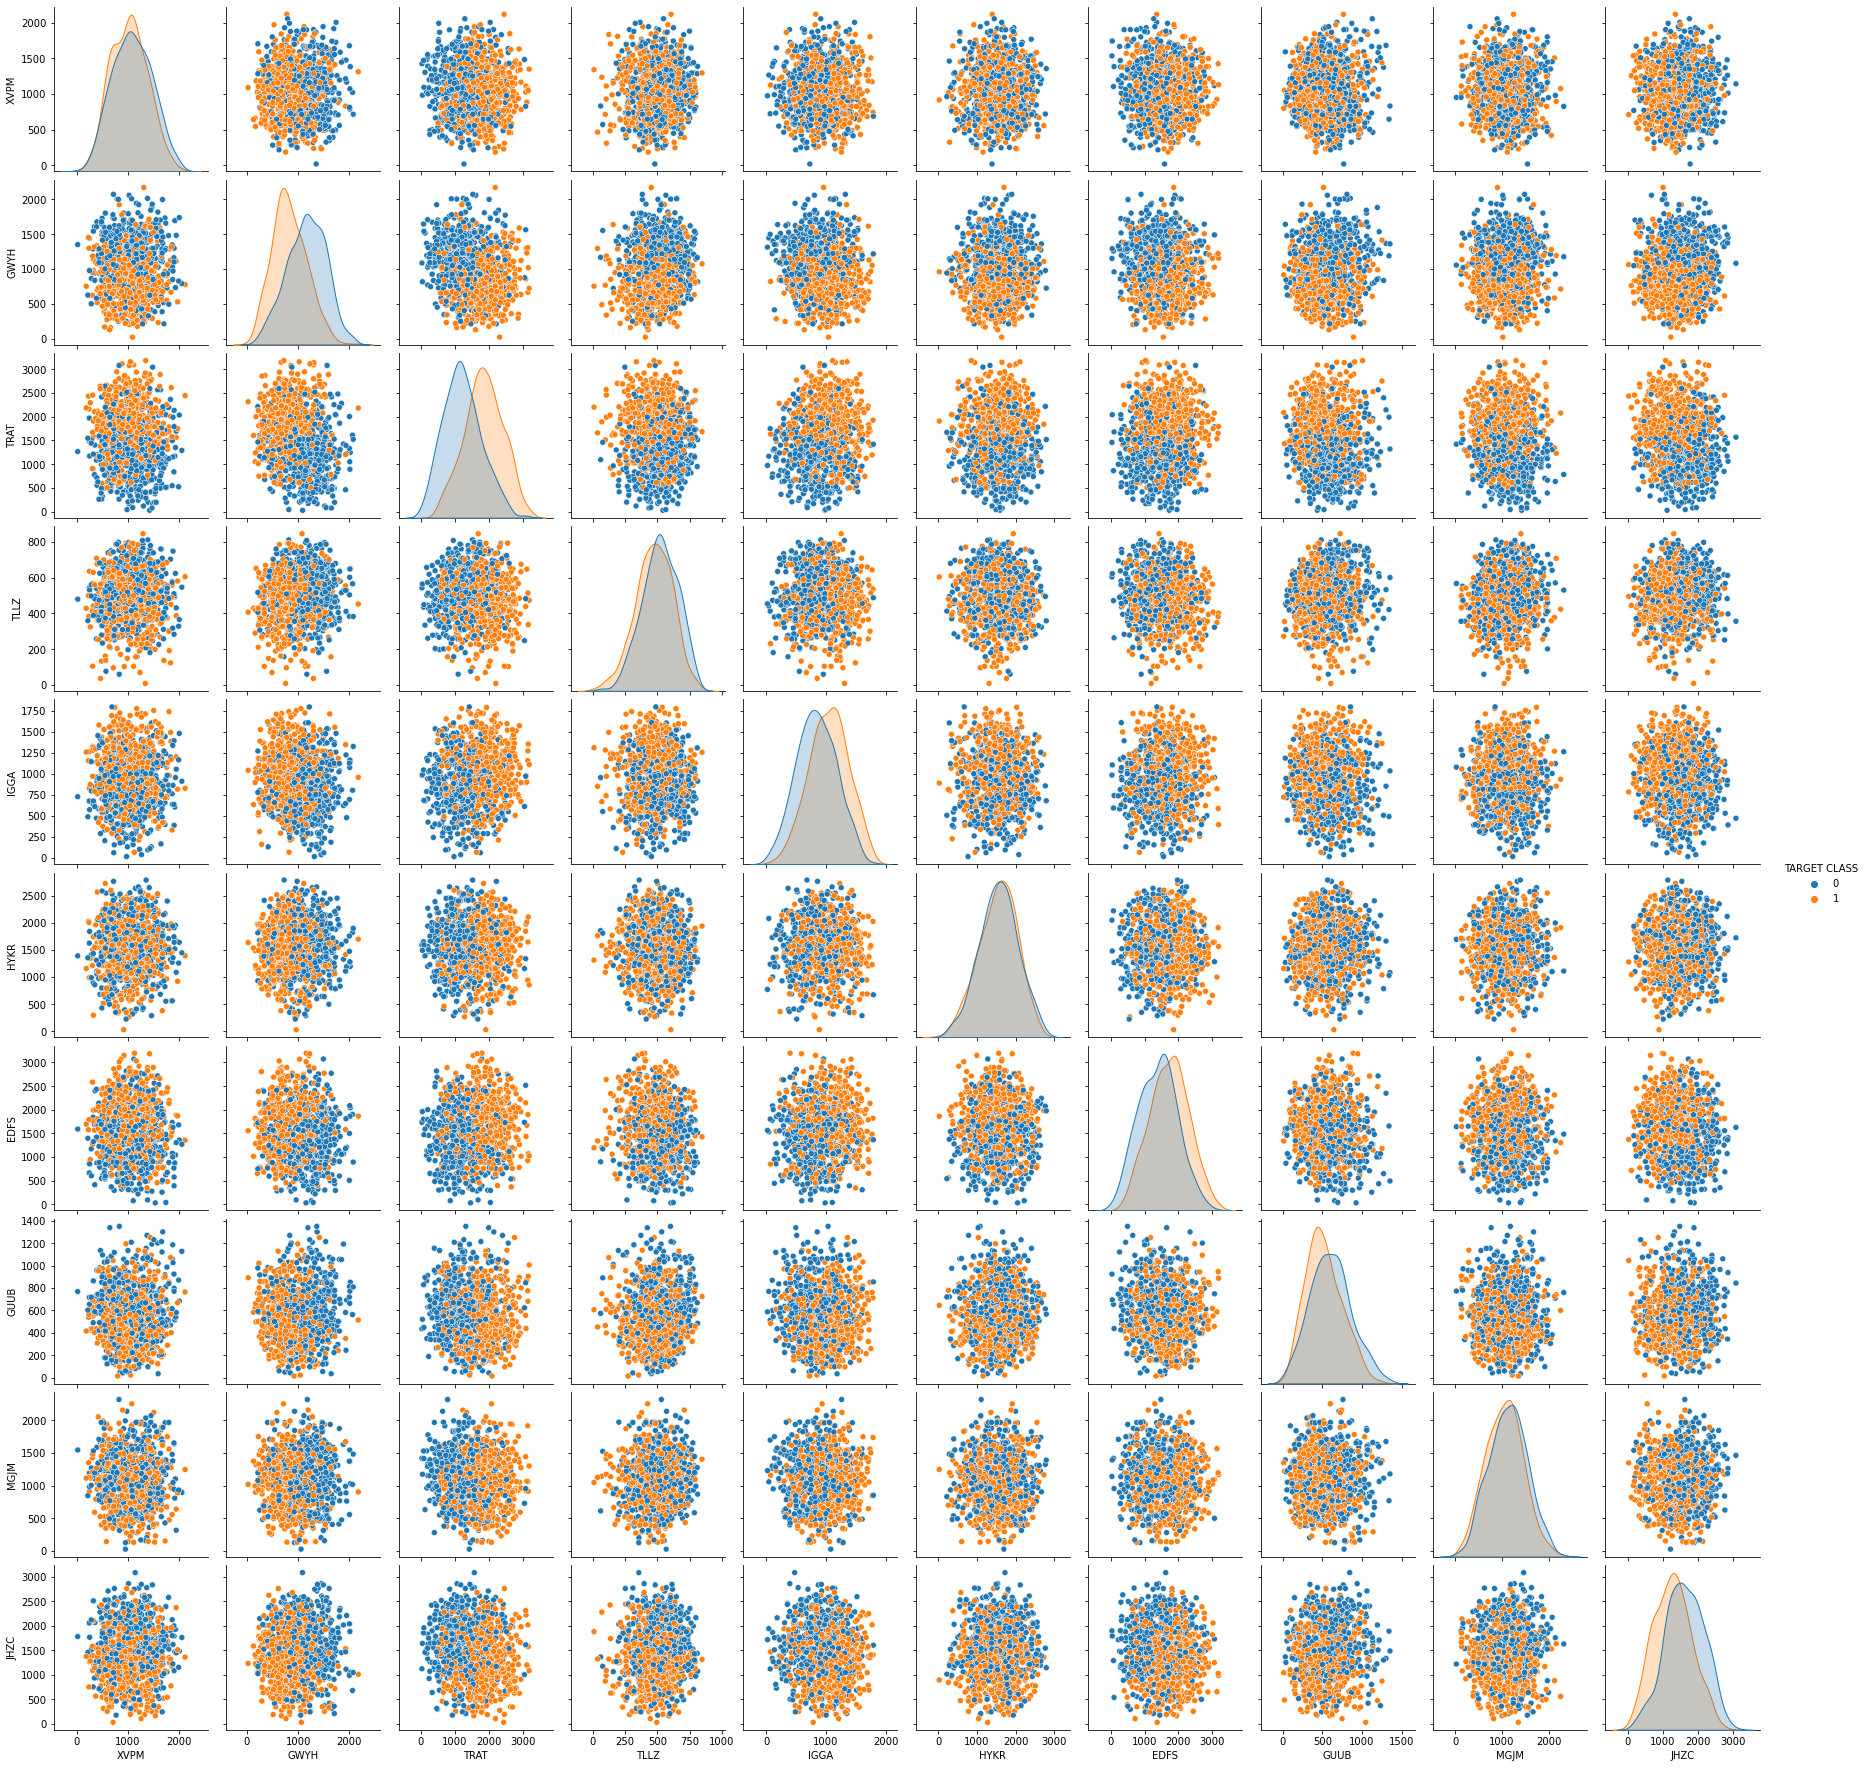

In [5]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS')

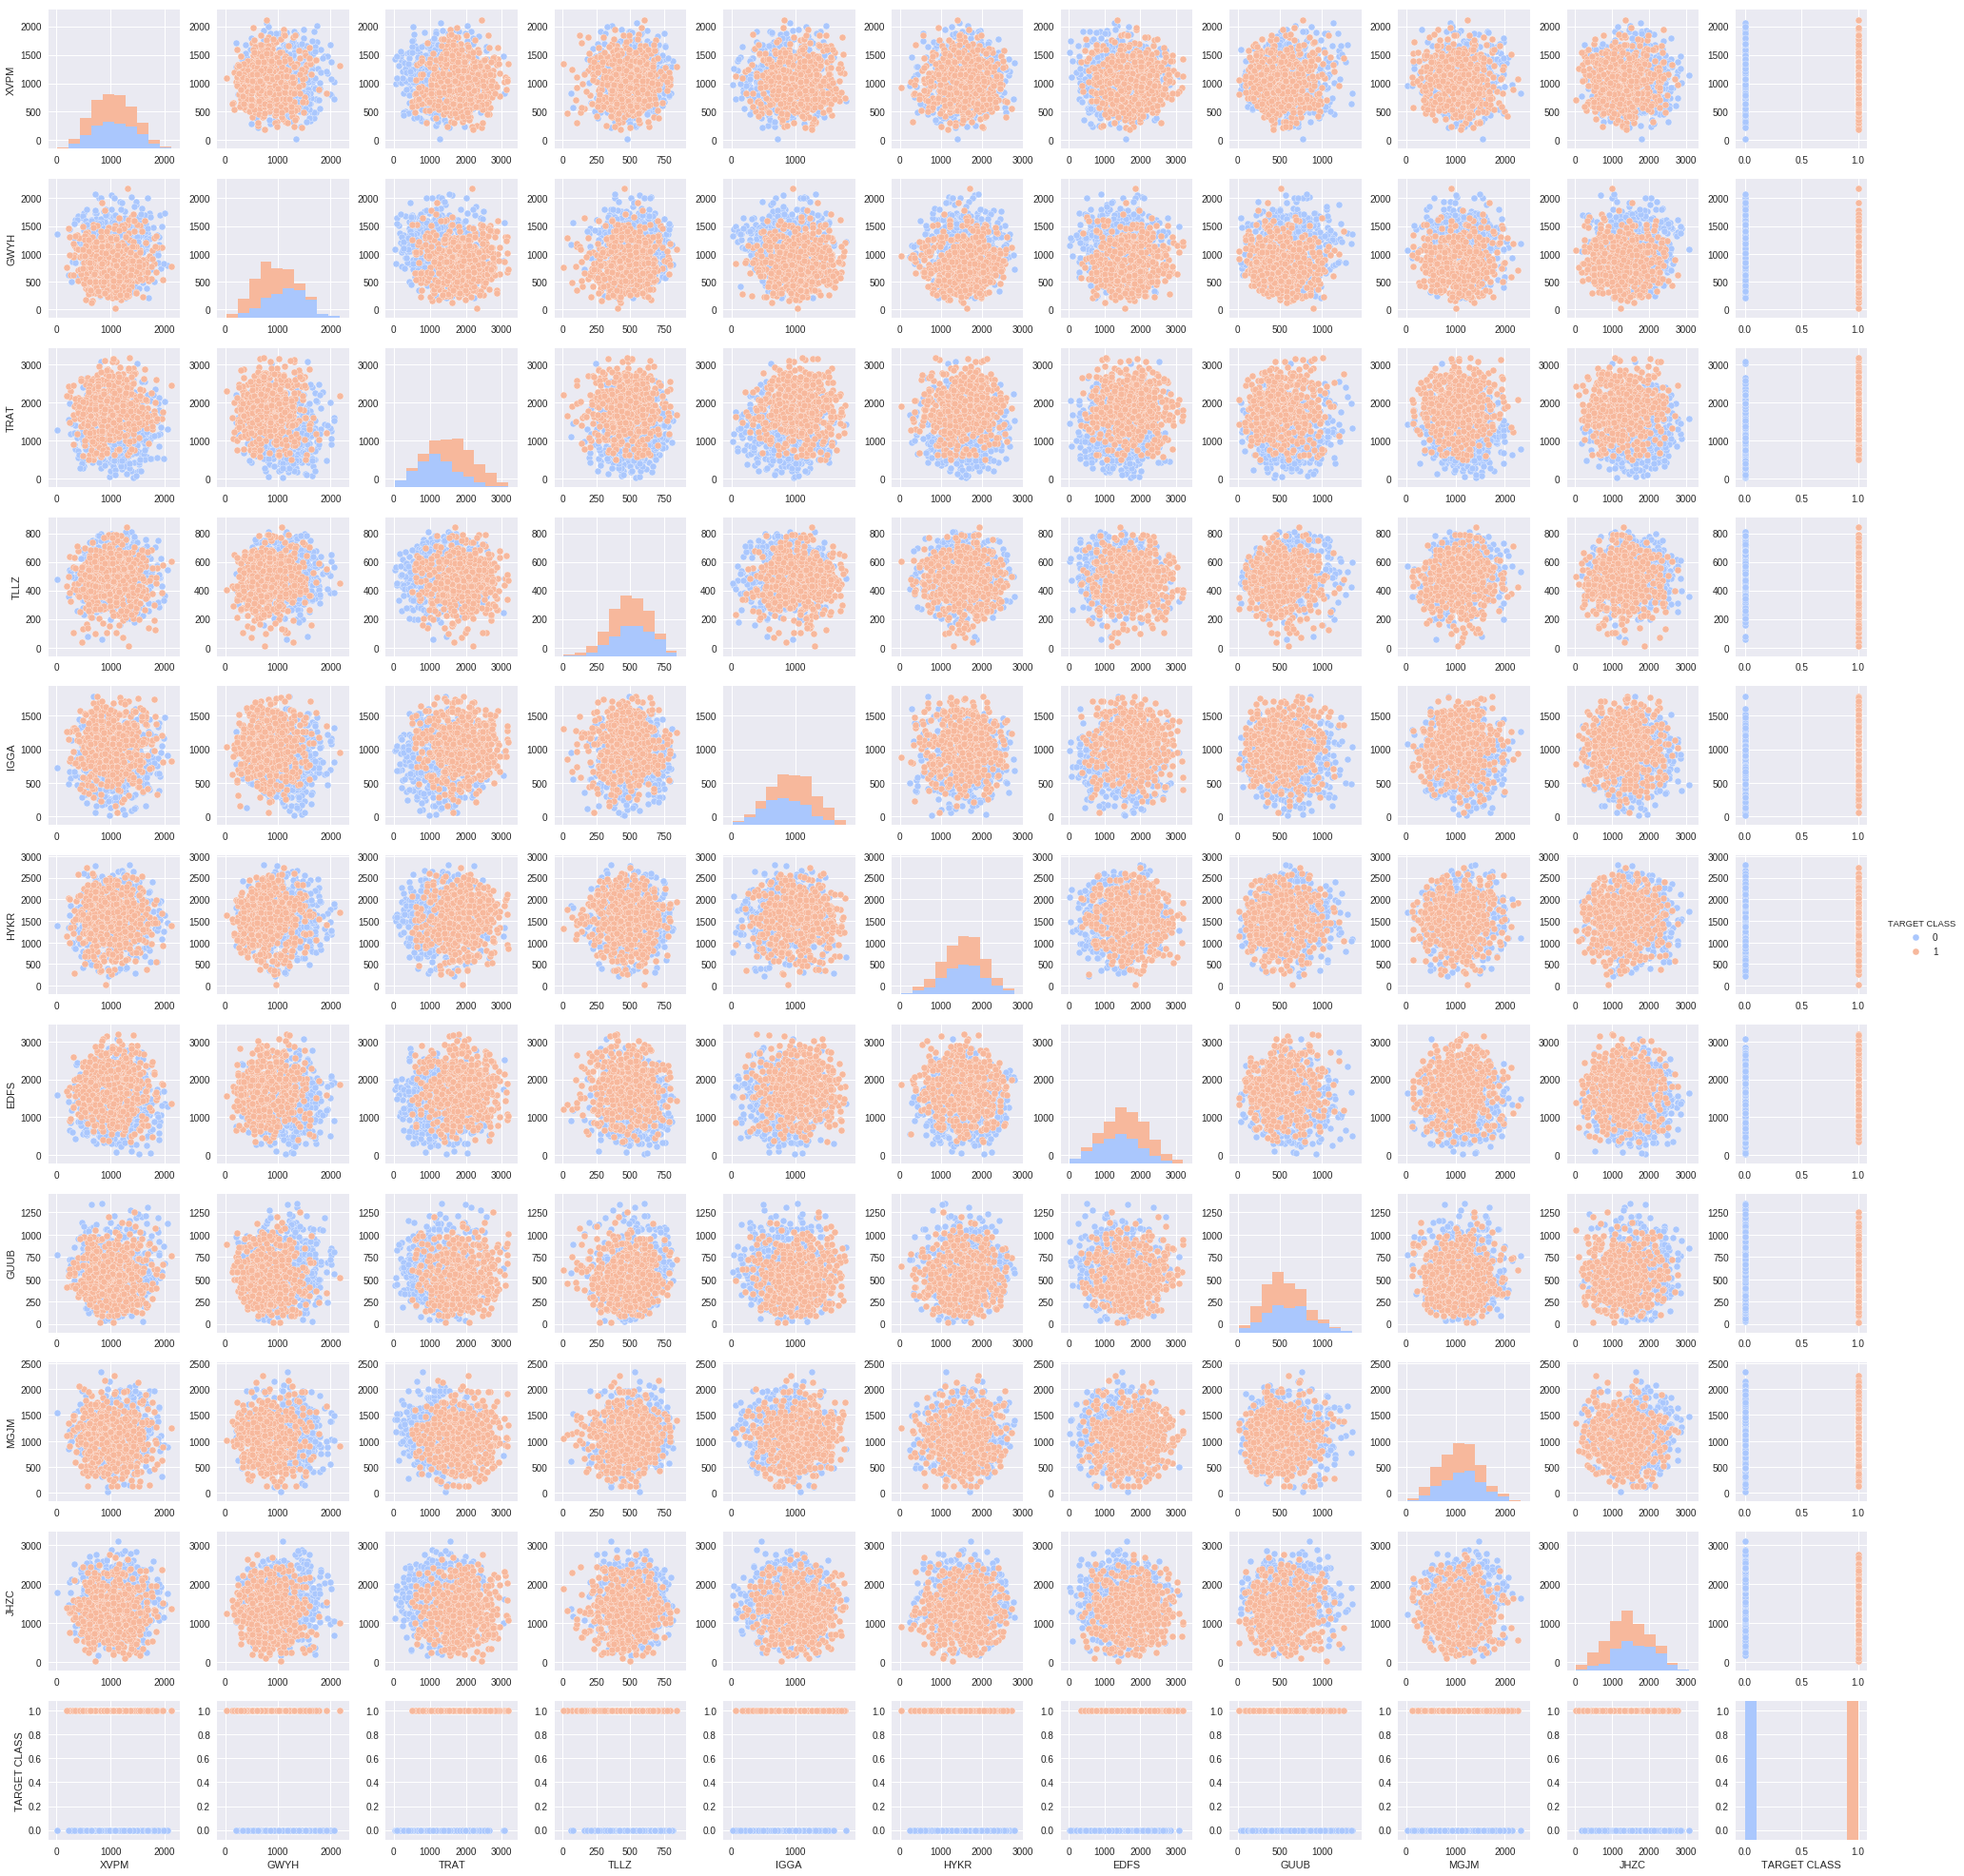

In [4]:
#Example Plot

**Answer this question:** 

do you think a small K value (say, less than 10) will work for this data set? Why or why not?

I Think a small k value will be pretty good for this data set but <10 may be to small while a large k value may oversmooth the dataset. Some of these classes have a lot of noise.

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [6]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [7]:
scaler = StandardScaler()

**Fit scaler to the features.** Remember we should exclude the 'TARGET CLASS' column.

In [9]:
scaler.fit(X=df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [10]:
X=scaler.transform(X=df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [11]:
scaledf = pd.DataFrame(X,columns=df.columns[:-1])
scaledf.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.** Make the test_size=0.3.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# create X_train, X_test, y_train, y_test
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [16]:
# Create a 1-NN classifier
KNN1=KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [17]:
KNN1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [18]:
y_predict=KNN1.predict(X_test)

**Create a confusion matrix and classification report.**

In [19]:
# import classification_report and confusion_matrix at the same time
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test,y_predict))

[[110  36]
 [ 47 107]]


In [17]:
#Example Result

[[113  42]
 [ 40 105]]


In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



In [18]:
#Example Result

             precision    recall  f1-score   support

          0       0.74      0.73      0.73       155
          1       0.71      0.72      0.72       145

avg / total       0.73      0.73      0.73       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In addition, to break ties, use distance as weight - if the is a tie, the neighbor(s) with smaller distance(s) will win.

In [22]:
err_rates = []
for idx in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))

**Now create the following plot using the information from your for loop.**

Text(0,0.5,'Error Rate')

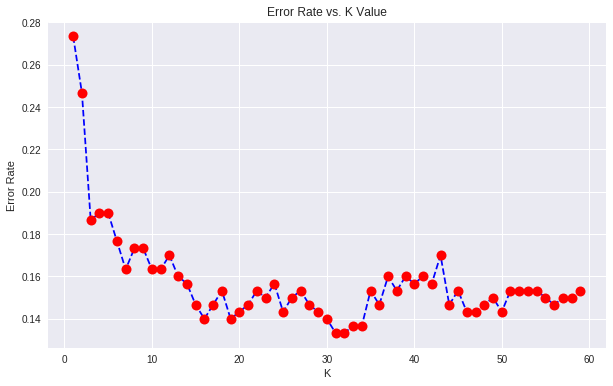

In [20]:
plt.figure(figsize=(10,6))


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [23]:
# Create a KNN model with your choice of K
# You should be able to get more than 80%
KNN1=KNeighborsClassifier(n_neighbors=30)
KNN1.fit(X_train,y_train)
y_predict=KNN1.predict(X_test)

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[127  19]
 [ 29 125]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.87      0.81      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Great Job!